# Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize

In [4]:
#Downloading nltk StopWords and Wordnet 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shahbaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shahbaz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Importing Dataset

In [5]:
dataset = pd.read_csv("C:/Users/Shahbaz/Downloads/Fake-news-project/Fake news project/train_news.csv")

In [6]:
dataset.head()

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

In [7]:
dataset.tail()

Unnamed: 0     id                                           headline  \
20795       20795   5671                                                NaN   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

           written_by                                               news  \
20795  NeverSurrender  No, you'll be a dog licking of the vomit of yo...   
20796   Rixon Stewart  By Rixon Stewart on November 5, 2016 Rixon Ste...   
20797     Eddy Lavine  posted by Eddie You know the Dakota Access Pip...   
20798  Alison S. Cohn  It’s officially summer, and the Society Boutiq...   
20799    Tom Ciccotta  Emory University in Atlanta, Georgia, has anno...   

       label  
20795      1  
20796      1  
20797      1  
20798      0  
20799      0

In [8]:
dataset.nunique()

Unnamed: 0    20800
id            20800
headline      19803
written_by     4201
news          20386
label             2
dtype: int64

In [9]:
dataset["Article"] = dataset["headline"] + dataset["written_by"]
dataset.sample(frac = 1) #Shuffle 100%

dataset.label[dataset.label == 'REAL'] = 1
dataset.label[dataset.label == 'FAKE'] = 0

dataset = dataset.loc[:,['Article','label']]
dataset = dataset.dropna()

C:\Users\Shahbaz\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
<ipython-input-9-64790ef656b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.label[dataset.label == 'REAL'] = 1
<ipython-input-9-64790ef656b9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.label[dataset.label == 'FAKE'] = 0


In this step we will clean the data that will be used for training.
The cleaning will involve these steps- 
1).Removing all the extra information like brackets, any kind of puctuations - commas, apostrophes, quotes, question marks, and more. 
2).Remove all the numeric text, urls.

In [10]:
from wordcloud import WordCloud, STOPWORDS

In [11]:
def wordpre(headline):
    headline = headline.lower()
    headline = re.sub('\[.*?\]', '', headline)
    headline = re.sub("\\W"," ",headline) # remove special chars
    headline = re.sub('https?://\S+|www\.\S+', '', headline)
    headline = re.sub('<.*?>+', '', headline)
    headline = re.sub('[%s]' % re.escape(string.punctuation), '', headline)
    headline = re.sub('\n', '', headline)
    headline = re.sub('\w*\d\w*', '', headline)
    
    return headline

In [12]:
#Applying the wordpre method to the dataset
dataset['Article']=dataset['Article'].apply(wordpre)

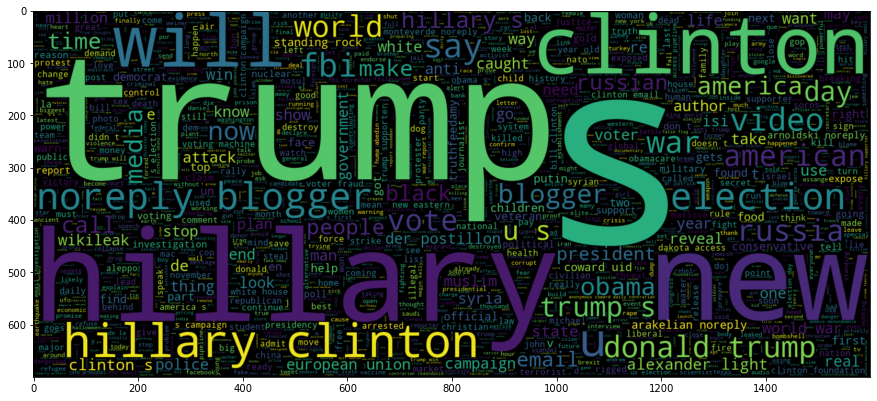

In [13]:
#word used in Real news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(dataset[dataset.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

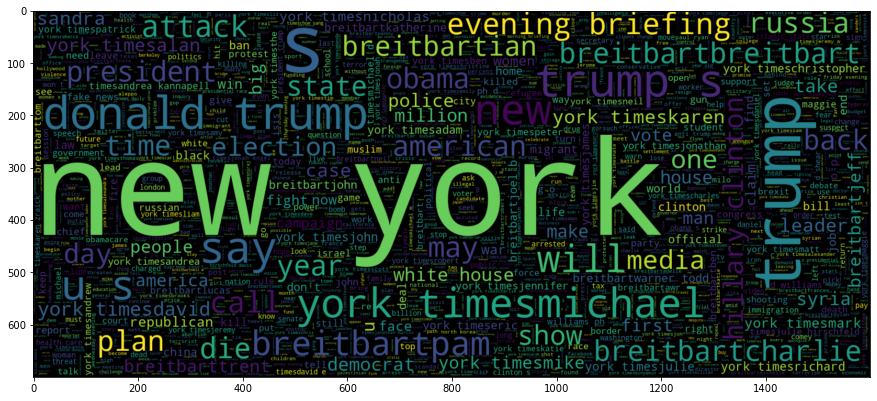

In [14]:
#word used in Fake news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(dataset[dataset.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 2

In [15]:
Dataset2_true = pd.read_csv("C:/Users/Shahbaz/Downloads/True.csv/True.csv")
Dataset2_fake = pd.read_csv("C:/Users/Shahbaz/Downloads/Fake.csv/Fake.csv")

In [16]:
Dataset2_true.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [17]:
Dataset2_fake.nunique()

title      17903
text       17455
subject        6
date        1681
dtype: int64

In [18]:
#Counting by Subjects in Real news
for key,count in Dataset2_true.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{Dataset2_true.shape[0]}")

politicsNews:	11272
worldnews:	10145
Total Records:	21417


In [19]:
#Counting by Subjects in Fake news
for key,count in Dataset2_fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{Dataset2_fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


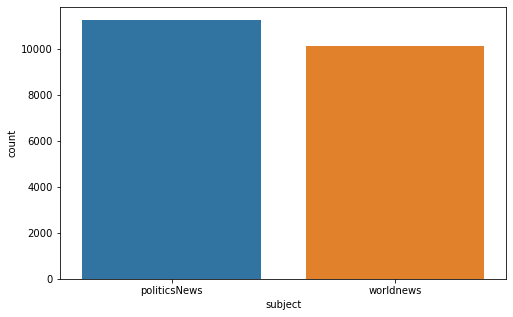

In [20]:
#ploting the Subjects in Real news
plt.figure(figsize=(8,5))
sns.countplot("subject", data=Dataset2_true)
plt.show()

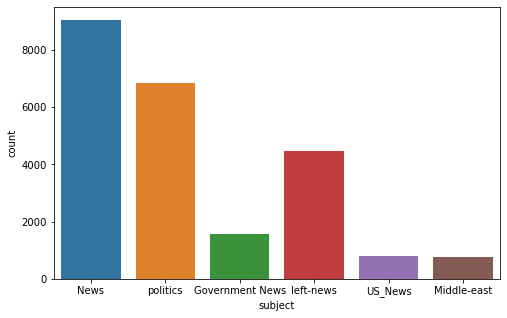

In [21]:
#ploting the Subjects in Fake news
plt.figure(figsize=(8,5))
sns.countplot("subject", data=Dataset2_fake)
plt.show()

In [22]:
Dataset2_true['label']= 1
Dataset2_fake['label']= 0
Dataset2 = pd.concat([Dataset2_true, Dataset2_fake])
Dataset2["Article"] = Dataset2["title"] + Dataset2["text"]
Dataset2.sample(frac = 1) #Shuffle 100%
Dataset2 = Dataset2.loc[:,['Article','label']]

In [23]:
Dataset2

Article  label
0      As U.S. budget fight looms, Republicans flip t...      1
1      U.S. military to accept transgender recruits o...      1
2      Senior U.S. Republican senator: 'Let Mr. Muell...      1
3      FBI Russia probe helped by Australian diplomat...      1
4      Trump wants Postal Service to charge 'much mor...      1
...                                                  ...    ...
23476  McPain: John McCain Furious That Iran Treated ...      0
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...      0
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...      0
23479  How to Blow $700 Million: Al Jazeera America F...      0
23480  10 U.S. Navy Sailors Held by Iranian Military ...      0

[44898 rows x 2 columns]

In [24]:
##  Applying the wordpre method to the dataset
Dataset2['Article']=Dataset2['Article'].apply(wordpre)

In [25]:
Dataset2.head()

Article  label
0  as u s  budget fight looms  republicans flip t...      1
1  u s  military to accept transgender recruits o...      1
2  senior u s  republican senator   let mr  muell...      1
3  fbi russia probe helped by australian diplomat...      1
4  trump wants postal service to charge  much mor...      1

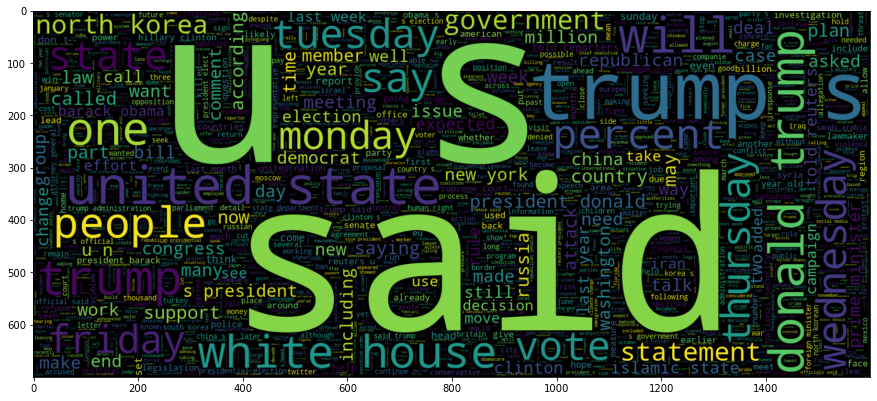

In [26]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

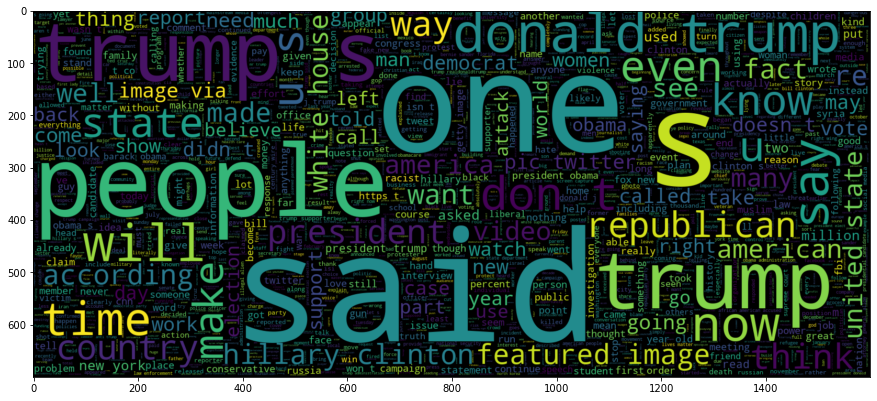

In [27]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score

In [37]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [38]:
#combining both the datsets into one
frames = [dataset, Dataset2]
Dataset = pd.concat(frames)

In [39]:
Dataset.shape

(63183, 2)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(Dataset['Article'], Dataset['label'], test_size=0.2, random_state=2020)

In [41]:
x_train.shape

(50546,)

In [42]:
x_test.shape

(12637,)

In [43]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [44]:
#LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

Logisticmodel = pipe.fit(x_train, y_train)
prediction = Logisticmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Logisticmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 96.61%


In [45]:
#DecisionTreeClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])
DecisionTreemodel = pipe.fit(x_train, y_train)
prediction = DecisionTreemodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
DecisionTreemodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 92.01%


In [46]:
#RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

RandomForestmodel = pipe.fit(x_train, y_train) 
prediction = RandomForestmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
RandomForestmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 97.68%


In [47]:
#Stochastic Gradient Descent
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])
SGDmodel = pipe.fit(x_train, y_train)
prediction = SGDmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
SDGmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 97.01%


In [48]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

GBCmodel = pipe.fit(x_train, y_train)
prediction = GBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
GBCmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 87.16%


In [49]:
#XGBClassifier
from xgboost import XGBClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

xgboostmodel = pipe.fit(x_train, y_train)
prediction = xgboostmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
xgboostmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

C:\Users\Shahbaz\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:11:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "loss" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 91.94%


In [50]:
#Multinomial Naive Bayes Classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

MNBCmodel = pipe.fit(x_train, y_train)
prediction = MNBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Multinomial_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 89.42%


In [51]:
#Bernoulli Naive Bayes Classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

BNBCmodel = pipe.fit(x_train, y_train)
prediction = BNBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Bernoulli_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 90.42%


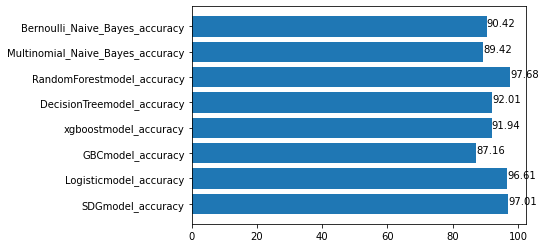

In [52]:
x = ["SDGmodel_accuracy", "Logisticmodel_accuracy", "GBCmodel_accuracy", "xgboostmodel_accuracy" , 
     "DecisionTreemodel_accuracy","RandomForestmodel_accuracy","Multinomial_Naive_Bayes_accuracy",
     "Bernoulli_Naive_Bayes_accuracy"]
y =  [SDGmodel_accuracy,Logisticmodel_accuracy,GBCmodel_accuracy,xgboostmodel_accuracy,
      DecisionTreemodel_accuracy,RandomForestmodel_accuracy,Multinomial_Naive_Bayes_accuracy,
      Bernoulli_Naive_Bayes_accuracy]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

Here we see Random Forest has the highest accuracy , hence we consider as a final model to Random Forest Classifier.

In [53]:
import joblib  
# Save the model as a pickle in a file 
joblib.dump(Logisticmodel, 'model.pkl')

['model.pkl']